In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pathlib as p
import joblib as j

In [2]:
path = p.Path('../data/processed/data_set.csv')

df = pd.read_csv(path)
df.head()

,id,edad,genero,estrato,residencia,estado_civil,periodo_inicio,repitencias_total,p201810,p201830,...,p202225,p202310,p202315,p202320,p202325,p202410,p202415,p202420,p202425,desertor
0,1,37,1,2,0,0,201860,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2,35,1,2,1,2,202110,0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,57,1,2,0,2,202310,8,4.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,31,1,2,0,0,201910,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5,32,1,2,0,0,202310,1,0.0,0.0,...,0.0,2.4,0.0,4.4,0.0,4.7,0.0,4.4,0.0,0


In [3]:
# [Preparar los datos]
X = df.drop('desertor',axis=1) # Esto es con lo que vamos a entrenar el modelo
y = df['desertor'] # Lo probaremos con estos datos

In [4]:
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state= 1)

# Tamaño del conjunto de prueba del 20 %
# random_state es como la semilla para reproducir la misma aleatoriedad

In [5]:
model = LogisticRegression(max_iter=5000) # Se crea el modelo

model.fit(X_train, y_train) # Se entrena el modelo

c:\Users\anfeh\Documents\Dev\proyecto_semillero\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [6]:
y_pred = model.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))

print('Matriz de confusion',confusion_matrix(y_test,y_pred))

print('Classification Report',classification_report(y_test,y_pred))

Accuracy Score 0.9782608695652174
Matriz de confusion [[58  1]
 [ 1 32]]
Classification Report               precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.97      0.97      0.97        33

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



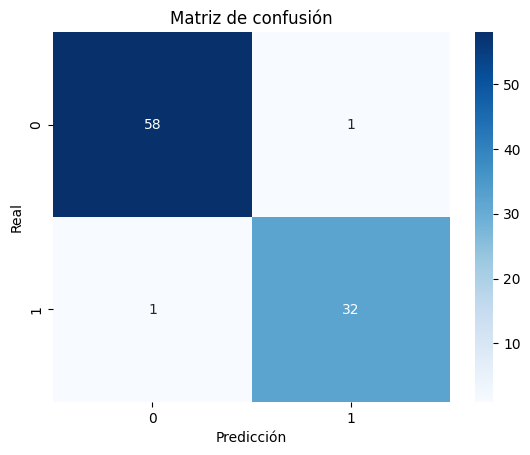

In [7]:
matriz_confusion = confusion_matrix(y_test,y_pred)

sns.heatmap(matriz_confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [9]:
path_save = p.Path('../models/modelo_regresion_logistica.pkl')
j.dump(model,path_save)

['..\\models\\modelo_regresion_logistica.pkl']